In [2]:
import pandas as pd
df=pd.read_excel('cleaned_1.xlsx')



In [3]:

df.head(10)

,pizza_id,order_id,pizza_name_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name
0,1,1,hawaiian_m,1,2015-01-01 00:00:00,11:38:36,13.25,13.25,M,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",The Hawaiian Pizza
1,2,2,classic_dlx_m,1,2015-01-01 00:00:00,11:57:40,16.00,16.00,M,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",The Classic Deluxe Pizza
2,3,2,five_cheese_l,1,2015-01-01 00:00:00,11:57:40,18.50,18.50,L,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",The Five Cheese Pizza
3,4,2,ital_supr_l,1,2015-01-01 00:00:00,11:57:40,20.75,20.75,L,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",The Italian Supreme Pizza
4,5,2,mexicana_m,1,2015-01-01 00:00:00,11:57:40,16.00,16.00,M,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",The Mexicana Pizza
5,6,2,thai_ckn_l,1,2015-01-01 00:00:00,11:57:40,20.75,20.75,L,Chicken,"Chicken, Pineapple, Tomatoes, Red Peppers, Tha...",The Thai Chicken Pizza
6,7,3,ital_supr_m,1,2015-01-01 00:00:00,12:12:28,16.50,16.50,M,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",The Italian Supreme Pizza
7,8,3,prsc_argla_l,1,2015-01-01 00:00:00,12:12:28,20.75,20.75,L,Supreme,"Prosciutto di San Daniele, Arugula, Mozzarella...",The Prosciutto and Arugula Pizza
8,9,4,ital_supr_m,1,2015-01-01 00:00:00,12:16:31,16.50,16.50,M,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",The Italian Supreme Pizza
9,10,5,ital_supr_m,1,2015-01-01 00:00:00,12:21:30,16.50,16.50,M,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",The Italian Supreme Pizza


In [4]:
# Strip spaces from column names
df.columns = df.columns.str.strip().str.lower()



In [5]:
df.describe()

,pizza_id,order_id,quantity,unit_price,total_price
count,48620.000000,48620.000000,48620.000000,48620.000000,48620.000000
mean,24310.500000,10701.479761,1.019622,16.494132,16.821474
std,14035.529381,6180.119770,0.143077,3.621789,4.437398
min,1.000000,1.000000,1.000000,9.750000,9.750000
25%,12155.750000,5337.000000,1.000000,12.750000,12.750000
50%,24310.500000,10682.500000,1.000000,16.500000,16.500000
75%,36465.250000,16100.000000,1.000000,20.250000,20.500000
max,48620.000000,21350.000000,4.000000,35.950000,83.000000


<Axes: title={'center': 'Daily Sales Over Time'}, xlabel='order_date'>

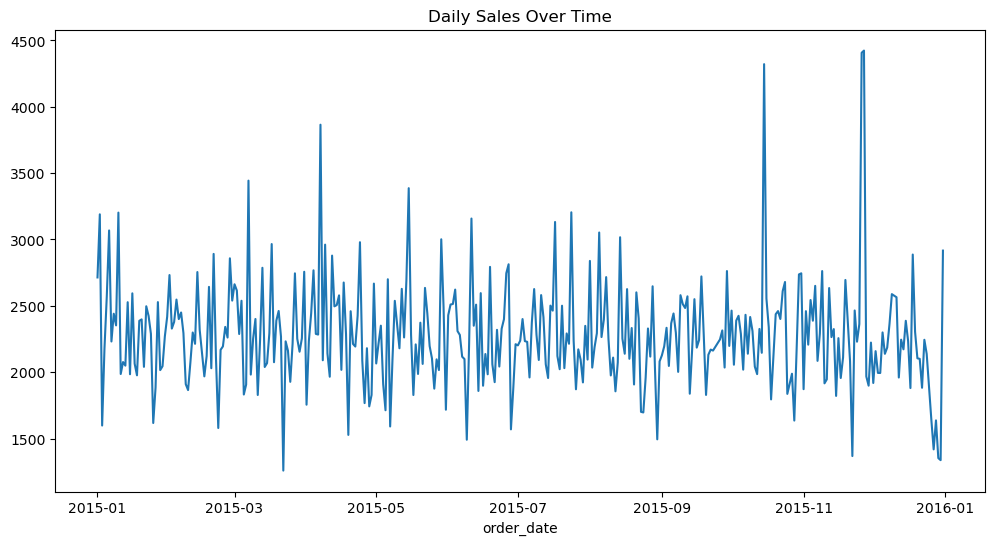

In [6]:
#  Sales Trends Over Time
# A. Daily / Weekly Sales


df['order_date'] = pd.to_datetime(df['order_date'])
daily_sales = df.groupby(df['order_date'].dt.date)['total_price'].sum()

daily_sales.plot(title="Daily Sales Over Time", figsize=(12, 6))


<Axes: title={'center': 'Sales by Hour'}, xlabel='order_hour'>

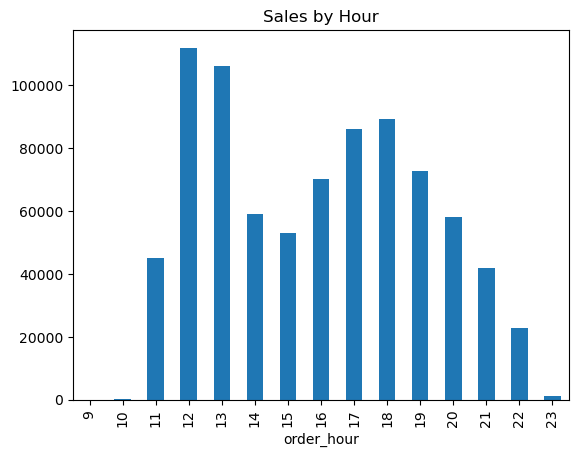

In [7]:
# . Sales by Hour


df['order_hour'] = pd.to_datetime(df['order_time'], format='%H:%M:%S').dt.hour
df.groupby('order_hour')['total_price'].sum().plot(kind='bar', title="Sales by Hour")


<Axes: title={'center': 'Pizza Category Frequency'}, xlabel='pizza_category'>

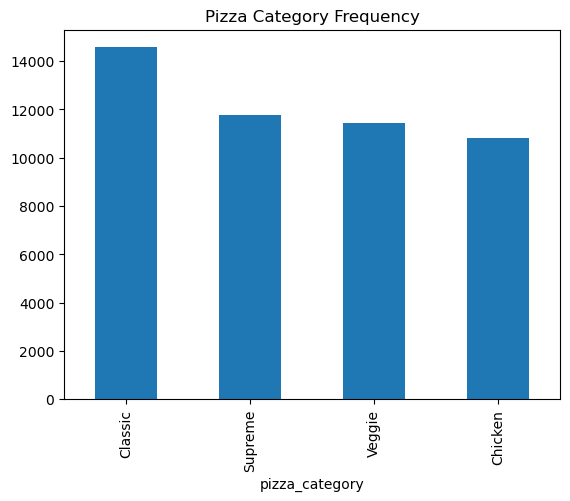

In [9]:
 ##3. Pizza Category & Size Analysis
# A. Most Popular Categories
df['pizza_category'].value_counts().plot(kind='bar', title='Pizza Category Frequency')


<Axes: title={'center': 'Revenue by Category'}, ylabel='pizza_category'>

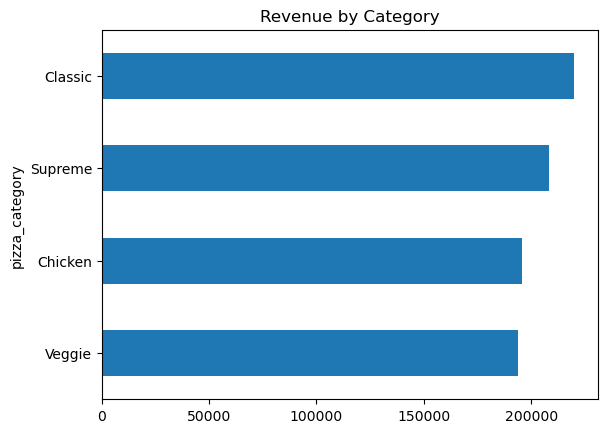

In [10]:
# Revenue by Category

df.groupby('pizza_category')['total_price'].sum().sort_values().plot(kind='barh', title="Revenue by Category")


<Axes: title={'center': 'Pizza Size Distribution'}, ylabel='count'>

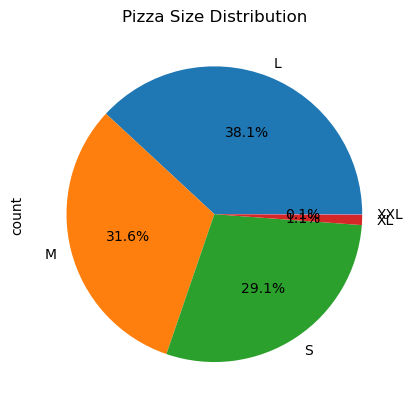

In [11]:
df['pizza_size'].value_counts().plot(kind='pie', autopct='%1.1f%%', title="Pizza Size Distribution")


<Axes: title={'center': 'Top-Selling Pizzas (by Quantity)'}, ylabel='pizza_name'>

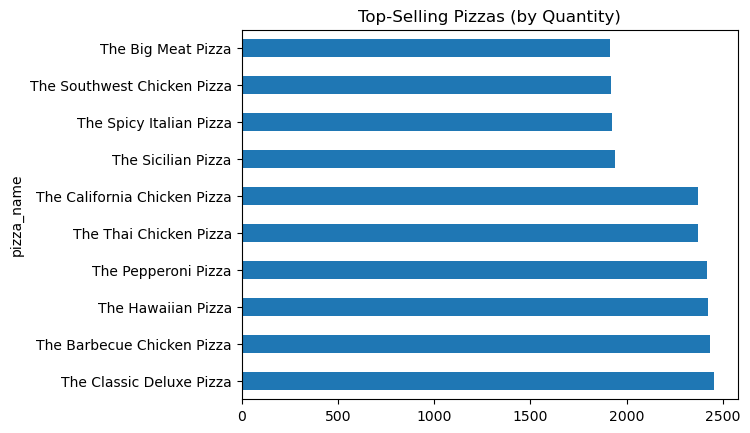

In [12]:
df.groupby('pizza_name')['quantity'].sum().sort_values(ascending=False).head(10).plot(kind='barh', title="Top-Selling Pizzas (by Quantity)")


<Axes: title={'center': 'Top-Selling Pizzas (by Revenue)'}, ylabel='pizza_name'>

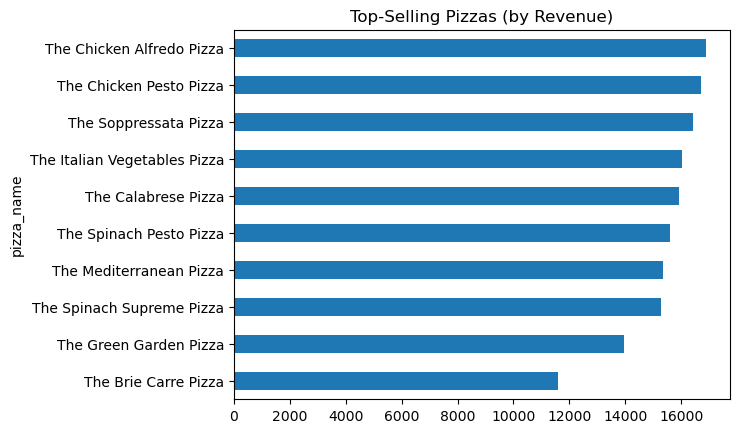

In [13]:
df.groupby('pizza_name')['total_price'].sum().sort_values(ascending=True).head(10).plot(kind='barh', title="Top-Selling Pizzas (by Revenue)")


In [14]:
# Average Order Value (AOV)
aov = df.groupby('order_id')['total_price'].sum().mean()
print(f"Average Order Value: ${aov:.2f}")


Average Order Value: $38.31


<Axes: title={'center': 'Top 10 Ingredients'}>

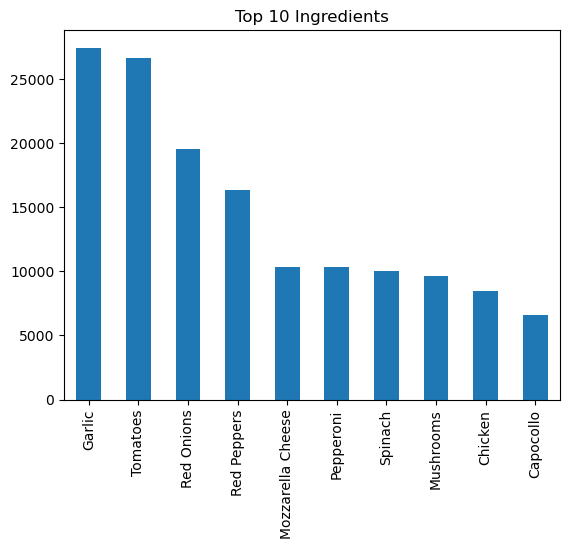

In [15]:
# . Ingredient Analysis

from collections import Counter
import matplotlib.pyplot as plt

ingredients = df['pizza_ingredients'].dropna().str.split(', ')
flat_ingredients = [item for sublist in ingredients for item in sublist]
ingredient_counts = Counter(flat_ingredients)

pd.Series(ingredient_counts).sort_values(ascending=False).head(10).plot(kind='bar', title='Top 10 Ingredients')


FEATURE ENGINEERING

In [16]:
# Convert to datetime
df['order_date'] = pd.to_datetime(df['order_date'])

# Extract features
df['year'] = df['order_date'].dt.year
df['month'] = df['order_date'].dt.month
df['day'] = df['order_date'].dt.day
df['weekday'] = df['order_date'].dt.day_name()
df['week'] = df['order_date'].dt.isocalendar().week
df['is_weekend'] = df['order_date'].dt.dayofweek >= 5


In [17]:
df.reset_index(inplace=True)

In [18]:
df.head(4)

,index,pizza_id,order_id,pizza_name_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name,order_hour,year,month,day,weekday,week,is_weekend
0,0,1,1,hawaiian_m,1,2015-01-01,11:38:36,13.25,13.25,M,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",The Hawaiian Pizza,11,2015,1,1,Thursday,1,False
1,1,2,2,classic_dlx_m,1,2015-01-01,11:57:40,16.00,16.00,M,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",The Classic Deluxe Pizza,11,2015,1,1,Thursday,1,False
2,2,3,2,five_cheese_l,1,2015-01-01,11:57:40,18.50,18.50,L,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",The Five Cheese Pizza,11,2015,1,1,Thursday,1,False
3,3,4,2,ital_supr_l,1,2015-01-01,11:57:40,20.75,20.75,L,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",The Italian Supreme Pizza,11,2015,1,1,Thursday,1,False


In [19]:
weekday_sales = df[df['weekday'].isin(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'])]['total_price']
weekend_sales = df[df['weekday'].isin(['Saturday', 'Sunday'])]['total_price']

print("Weekday Avg Sales:", weekday_sales.mean())
print("Weekend Avg Sales:", weekend_sales.mean())


Weekday Avg Sales: 16.83922710653856
Weekend Avg Sales: 16.774507010572094
